In [158]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import math
from math import pi
from scipy.cluster.hierarchy import dendrogram, linkage

In [166]:
df = pd.read_fwf('D:\Downloads\Clone\Data Visualization\Homework_sampledata1.txt', sep = '\s+')
df = df.set_index('2008')
months = [date(2008,m,1).strftime('%b') for m in range(1,13)]
df.columns = months

df = df.replace(-99.0, np.nan)
df_column = [df.iloc[0:,i] for i in range(12)]
# df_column = list(df_column)

x = []
for i in range(len(df_column)):
    without_nan = [x for x in df_column[i] if not math.isnan(x)]
    x.append(without_nan)

df_row = [df.iloc[i,0:] for i in range(31)]

y = []
for i in range(len(df_row)):
    without_nan = [j for j in df_row[i] if not math.isnan(j)]
    y.append(without_nan)

In [167]:
x = np.arange(1,13)
y = np.arange(1,32)

x_axis, y_axis = np.meshgrid(y,x)

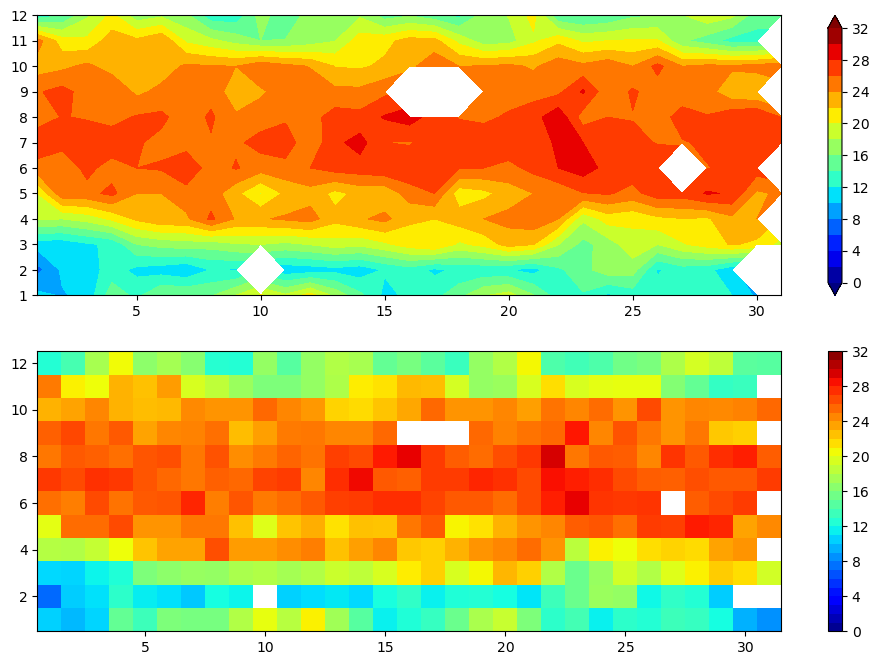

In [207]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(2,1,1)
plt.contourf(x_axis,y_axis,df.T,cmap='jet',vmax=32,vmin=0, levels = range(0,33,2), extend = 'both')
plt.colorbar()
plt.yticks(range(1,13))

ax = fig.add_subplot(2,1,2)
plt.pcolormesh(x_axis,y_axis,df.T, cmap = 'jet',vmax=32,vmin=0 )
plt.colorbar(ticks=range(0,33,4), boundaries = range(0,33))

plt.show()

[Text(1, 0, '1'),
 Text(5, 0, '5'),
 Text(10, 0, '10'),
 Text(15, 0, '15'),
 Text(20, 0, '20'),
 Text(25, 0, '25'),
 Text(30, 0, '30')]

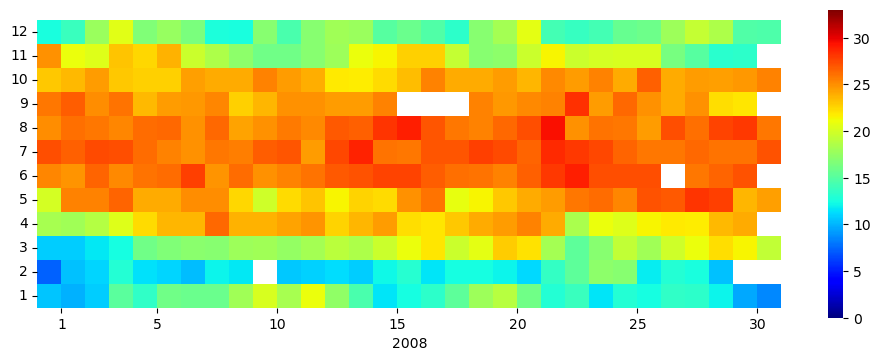

In [141]:
plt.figure(figsize = (12,4))
ax = sns.heatmap(df.T,cmap='jet',square=True, vmin=0,vmax=33)
ax.invert_yaxis()
ax.set_yticklabels(range(1,13))
ax.set_xticks([1,5,10,15,20,25,30])
ax.set_xticklabels([1,5,10,15,20,25,30])

In [149]:
feature = []
for i in range(len(df.columns)):
    month = df.iloc[0:,i]
    month_feature = []
    month_feature.append(np.nanmean(month[0:5]))
    month_feature.append(np.nanmean(month[5:10]))
    month_feature.append(np.nanmean(month[10:15]))
    month_feature.append(np.nanmean(month[15:20]))
    month_feature.append(np.nanmean(month[20:25]))
    month_feature.append(np.nanmean(month[25:]))
    feature.append(month_feature)
feature = np.array(feature)

In [150]:
no_category = np.size(feature,1)
no_category

6

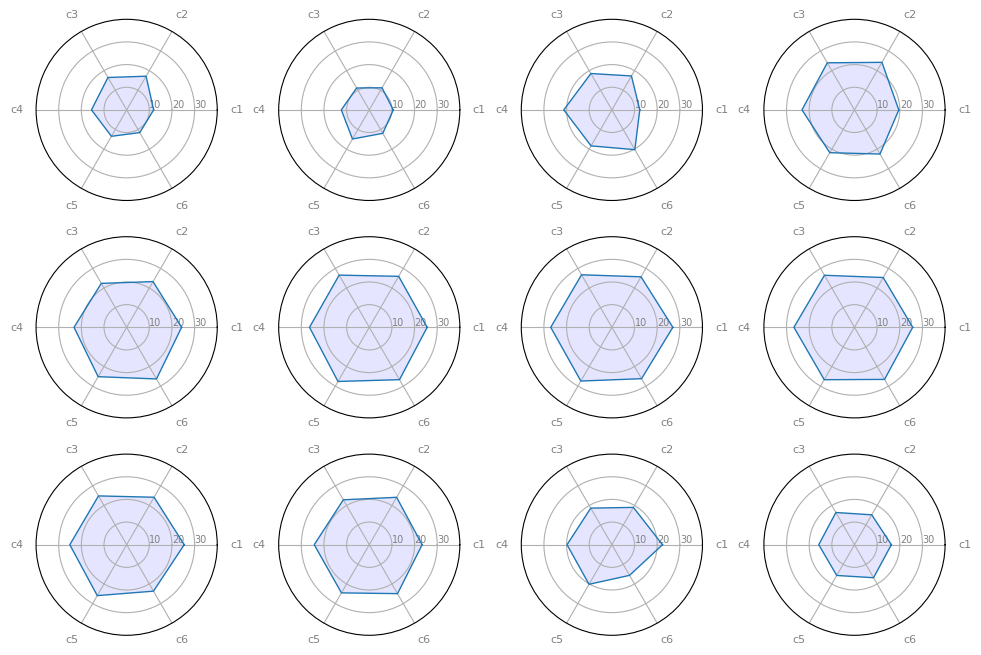

In [153]:
fig = plt.figure(figsize=(12,8))
for i in range(0,12):
    ax = plt.subplot(3,4, i+1,polar=True)
    angles = [n / float(no_category)*2*pi for n in range(no_category)]
    angles += angles[:1]

    plt.xticks(angles[:-1], ['c1','c2','c3','c4','c5','c6'], color = 'grey', size = 8)

    ax.set_rlabel_position(0)
    plt.yticks([10,20,30], ['10','20','30'], color = 'grey', size = 7)
    plt.ylim(0,40)

    plot_df = np.concatenate((feature[i,:], feature[i,:1]))
    ax.plot(angles,plot_df, linewidth=1,linestyle='solid')
    ax.fill(angles,plot_df,'b',alpha=0.1)
plt.show()

In [155]:
X = np.random.randn(40).reshape(20,2)
X.shape

(20, 2)

In [156]:
feature.shape

(12, 6)

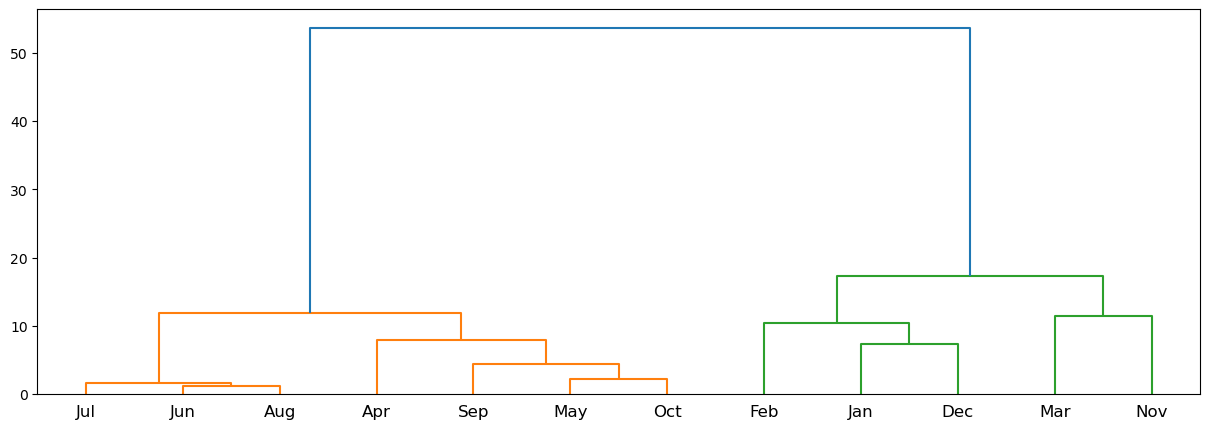

In [164]:
fig = plt.figure(figsize=(15,5))
Z = linkage(feature,'ward')
df = dendrogram(Z,labels = months)
plt.show()